```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 2

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 2.1

In this exercise, we estimate the value of
$$I = \int_0^1 \text dx f(x) = 1,$$
where
$$f(x) = \frac{\pi}{2}\cos\left(\frac\pi 2 x\right).$$

To do so, we use a Monte Carlo method sampling from two different distributions.

In [3]:
# Read parameters from info file
with open("data/2.1-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_throws_per_block = {N_throws_per_block}")

# Read data
data_unif = np.loadtxt("data/2.1-unif.dat")
data_importance = np.loadtxt("data/2.1-importance.dat")

N_blocks = 100
N_throws_per_block = 10000


### Uniform sampling

We sample uniformely distributed values $x_i$ in $[0, 1)$, and use the mean of the $f(x_i)$ as an estimator for the integral.

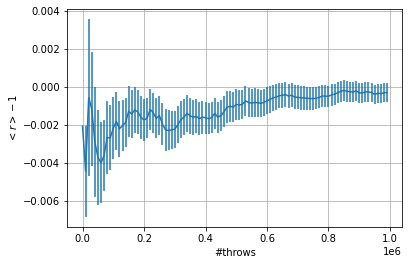

<r>-1 = -0.0003 ± 0.0005


In [4]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data_unif[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-1$")
plt.grid(True)
plt.show()
print(f"<r>-1 = {y[-1, 0]-1:.4f} ± {y[-1, 1]:.4f}")

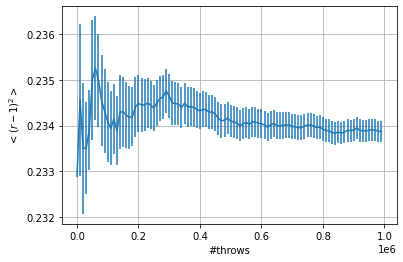

<(r-1)^2> = 0.2339 ± 0.0002


In [5]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data_unif[:, 1])
plt.errorbar(x, y[:, 0], yerr=y[:, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<(r-1)^2>$")
plt.grid(True)
plt.show()
print(f"<(r-1)^2> = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")

### Importance sampling

To reduce the variance, we sample from a distribution that is more "similar" to the $f(x)$ we need to integrate.

Its Taylor expansion in $x=0$, $$\frac{\pi}{2}\left(1 - \frac{\pi^2}{4} x^2\right),$$ has a change of sign, so it can't be used.

The expansion in $x=1$, $$\frac\pi 2(1-x)$$ instead is always positive in the considered interval.

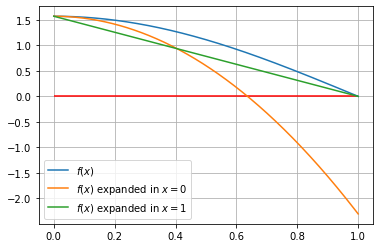

In [6]:
t = np.linspace(0, 1, 1000)
f = np.pi/2 * np.cos(np.pi/2 * t)
f0 = np.pi/2 * (1 - np.pi*np.pi/4 * t*t)
f1 = np.pi/2 * (1 - t)

plt.grid()
plt.plot(t, f, label="$f(x)$")
plt.plot(t, f0, label="$f(x)$ expanded in $x=0$")
plt.plot(t, f1, label="$f(x)$ expanded in $x=1$")
plt.hlines(0, 0, 1, color="red")
plt.legend()
plt.show()

Therefore, we use $p(x) \propto 1-x$. By integration, a normalization of $\frac 1 2$ is found, so that
$$I = \int_0^1 \text dx g(x)p(x),$$
$$g(x) = \frac\pi 2 \cos\left(\frac\pi 2 x\right) \cdot \frac 1 {2(1-x)},$$
$$p(x) = 2(1-x)$$

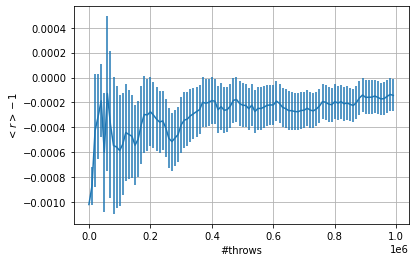

<r>-1 = -0.0001 ± 0.0001


In [7]:
y = blocks_value(data_importance[:,0])
plt.errorbar(x,y[:,0]-1, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-1$")
plt.grid(True)
plt.show()
print(f"<r>-1 = {y[-1, 0]-1:.4f} ± {y[-1, 1]:.4f}")

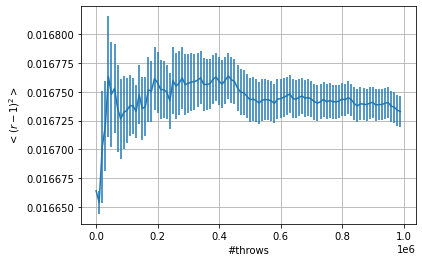

<(r-1)^2> = 0.01673 ± 0.00001


In [8]:
y = blocks_value(data_importance[:, 1])
plt.errorbar(x, y[:, 0], yerr=y[:, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<(r-1)^2>$")
plt.grid(True)
plt.show()
print(f"<(r-1)^2> = {y[-1, 0]:.5f} ± {y[-1, 1]:.5f}")

We can notice that using importance sampling, the variance is more than 10 times smaller than with uniform sampling.

## Exercise 2.2

In this exercise, we simulate a random walk. Since the lattice has $a=1$ and $\tau=1$, the expected distance from the origin is
$$\sqrt{\left<x^2\right>} = \sqrt{\frac{a^2}{\tau} t} = \sqrt{t},$$
where $t$ is the number of steps in the RW.

In [9]:
with open("data/2.2-info.dat") as file:
    N_blocks = int(file.readline())
    N_walks_per_block = int(file.readline())
    N_steps_per_walk = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_walks_per_block = {N_walks_per_block}\nN_steps_per_walk = {N_steps_per_walk}")

data_disc = np.loadtxt("data/2.2-disc.dat")
data_cont = np.loadtxt("data/2.2-cont.dat")

N_blocks = 100
N_walks_per_block = 1000
N_steps_per_walk = 100


### Discrete case

At first, we simulate the discrete case, where at each step the walker moves forwards or backwards (with equal probability) in one of the three $\hat e_i$ directions, chosen at random with equal probability.

In [10]:
disc = []
for i in range(N_steps_per_walk):
    disc.append(blocks_value(data_disc[:, i]))
disc = np.array(disc)

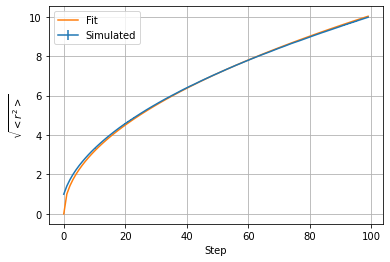

Best fit: (1.0077 ± 0.0019) * sqrt(x)


In [11]:
x = np.arange(N_steps_per_walk)
plt.grid()
plt.errorbar(x, disc[:, -1, 0], yerr=disc[:, -1, 1], label="Simulated")

f = lambda x, k: k * np.sqrt(x)
popt, pcov = curve_fit(f, x, disc[:, -1, 0])
k = popt[0]
sigma = np.sqrt(pcov[0, 0])
plt.plot(x, f(x, k), label='Fit')

plt.xlabel("Step")
plt.ylabel("$\\sqrt{<r^2>}$")
plt.legend()
plt.show()

print(f"Best fit: ({k:.4f} ± {sigma:.4f}) * sqrt(x)")

The fit shows a diffusive behaviour.

We now consider in particular the mean distance for the last step, to check the behaviour of the mean block method.

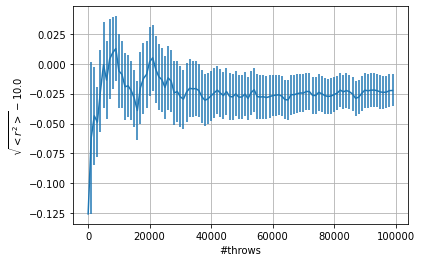

sqrt(<r^2>)-10.0 = -0.022 ± 0.013


In [12]:
x = np.arange(N_blocks) * N_walks_per_block
expected = np.sqrt(N_steps_per_walk)

plt.errorbar(x, disc[-1, :, 0] - expected, yerr=disc[-1, :, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<r^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<r^2>)-{expected} = {disc[-1, -1, 0]-expected:.3f} ± {disc[-1, -1, 1]:.3f}")

The walked distance is about two $\sigma$ from the expected value.

### Continuous case

Then, we simulate a continuous RW, where the walker samples uniformely a random direction in the 3D space, and moves by a fixed amount $a$ in that direction.

In [13]:
cont = []
for i in range(N_steps_per_walk):
    cont.append(blocks_value(data_cont[:, i]))
cont = np.array(cont)

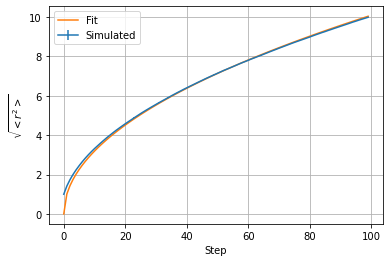

Best fit: (1.0089 ± 0.0019) * sqrt(x)


In [14]:
x = np.arange(N_steps_per_walk)
plt.grid()
plt.errorbar(x, cont[:, -1, 0], yerr=cont[:, -1, 1], label="Simulated")

f = lambda x, k: k * np.sqrt(x)
popt, pcov = curve_fit(f, x, cont[:, -1, 0])
k = popt[0]
sigma = np.sqrt(pcov[0, 0])
plt.plot(x, f(x, k), label='Fit')

plt.xlabel("Step")
plt.ylabel("$\\sqrt{<r^2>}$")
plt.legend()
plt.show()

print(f"Best fit: ({k:.4f} ± {sigma:.4f}) * sqrt(x)")

The fit shows a diffusive behaviour.

We now consider in particular the mean distance for the last step, to check the behaviour of the mean block method.

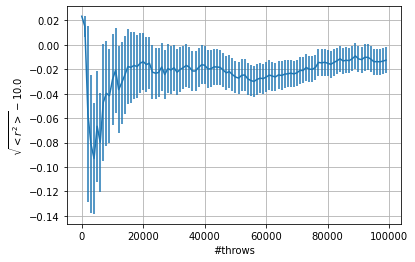

sqrt(<r^2>)-10.0 = -0.012 ± 0.010


In [15]:
x = np.arange(N_blocks) * N_walks_per_block
expected = np.sqrt(N_steps_per_walk)

plt.errorbar(x, cont[-1, :, 0] - expected, yerr=cont[-1, :, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$\sqrt{<r^2>}-" f"{expected}" r"$")
plt.grid(True)
plt.show()
print(f"sqrt(<r^2>)-{expected} = {cont[-1, -1, 0]-expected:.3f} ± {cont[-1, -1, 1]:.3f}")

The walked distance is about one $\sigma$ from the expected value.